**Nama : Rafa Fadil Aras**

**Kelas : TI-3G**

**NIM : 2341720007**

## **Tugas**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import hdbscan

In [ ]:
iris = load_iris()
X = iris.data
y_true = iris.target

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("Dimensi data asli:", X.shape)
print("Dimensi data setelah PCA:", X_pca.shape)

Dimensi data asli: (150, 4)
Dimensi data setelah PCA: (150, 2)


In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1)
clusterer.fit(X)

labels_pred = clusterer.labels_

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
print("\n--- HASIL CLUSTERING ---")
n_clusters_ = len(set(labels_pred)) - (1 if -1 in labels_pred else 0)
n_noise_ = list(labels_pred).count(-1)

print(f'Jumlah cluster yang terbentuk: {n_clusters_}')
print(f'Banyaknya data noise: {n_noise_}')


--- HASIL CLUSTERING ---
Jumlah cluster yang terbentuk: 2
Banyaknya data noise: 0


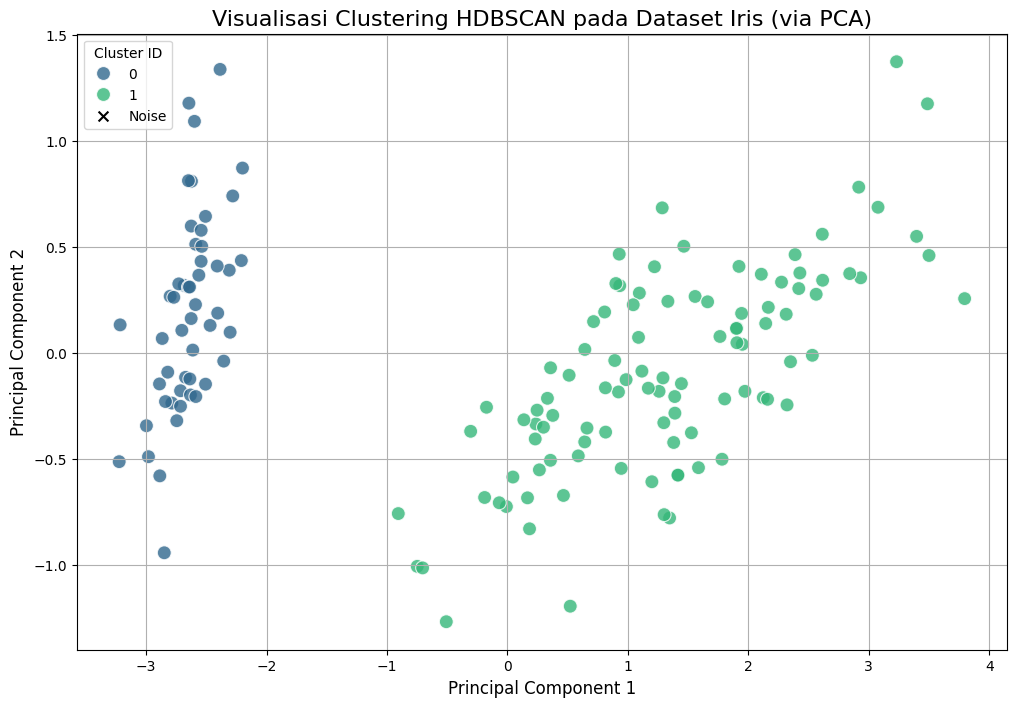

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels_pred,
    palette="viridis",
    s=100,
    alpha=0.8
)

# Menandai titik noise secara khusus
noise_points = X_pca[labels_pred == -1]
plt.scatter(
    noise_points[:, 0],
    noise_points[:, 1],
    color='black',
    marker='x',
    s=50,
    label='Noise'
)

plt.title('Visualisasi Clustering HDBSCAN pada Dataset Iris (via PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

Analisis :

* **Jumlah Cluster yang Terbentuk:** HDBSCAN mendeteksi 2 cluster.
* **Banyaknya Noise:** Tidak ada titik data yang diklasifikasikan sebagai noise (0 noise).
* **Perbandingan dengan Label Asli:** Dataset Iris memiliki 3 kelas (label asli 0, 1, dan 2). Hasil clustering HDBSCAN dengan parameter default hanya mengidentifikasi 2 cluster. Ini menunjukkan bahwa HDBSCAN berhasil memisahkan satu kelas (kemungkinan kelas Setosa, berdasarkan visualisasi dan urutan data), tetapi menggabungkan dua kelas lainnya menjadi satu cluster. Dengan demikian, hasil clustering HDBSCAN dengan parameter default pada dataset Iris tidak sepenuhnya sesuai dengan 3 label asli dataset tersebut. Diperlukan penyesuaian parameter HDBSCAN (seperti min_cluster_size atau min_samples) untuk melihat apakah bisa mendapatkan jumlah cluster yang lebih dekat dengan jumlah kelas asli.